In [1]:
import random
import numpy as np
from multiprocessing import Process, Manager
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import count
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

In [5]:
dfff = pd.read_csv("../main_outcomes_race.csv")

In [6]:
dfff[dfff['race']=='black']

,race,treatment,outcome,effect,upper_conf,lower_conf,control_mean,treatment_mean,p_boot
0,black,MedianFamilyIncome,Fresh_FV,-6.497077,4.788560,4.731838,0.567452,0.606881,0.004
1,black,MedianFamilyIncome,fast_food,5.464076,5.235980,5.177444,0.424517,0.402522,0.015
2,black,MedianFamilyIncome,soda,14.152972,21.609883,16.914224,0.028680,0.025124,0.061
3,black,MedianFamilyIncome,bmi,3.694906,2.012208,1.767282,30.936420,29.834079,0.000
4,black,MedianFamilyIncome,bmi_abs,1.102341,0.571851,0.519249,30.936420,29.834079,0.000
5,black,MedianFamilyIncome,ow,8.100973,4.178152,3.577271,0.810801,0.750040,0.000
18,black,no_college,Fresh_FV,11.243099,5.615749,4.803707,0.620358,0.557659,0.000
19,black,no_college,fast_food,-7.612591,4.882588,4.413740,0.391460,0.423716,0.002
20,black,no_college,soda,-5.623083,13.010717,11.655135,0.025020,0.026511,0.191
21,black,no_college,bmi,-5.512393,1.495758,1.590498,29.633628,31.362450,0.000


In [7]:
def getData(outcome, race):
    col = dfff[(dfff["outcome"]==outcome) & (dfff["race"]==race)]
    output= []
    for i, row in col.iterrows():
        label = ""
        if row["treatment"]=="MedianFamilyIncome":
            label = "High Income"
        if row["treatment"]=="no_college":
            label = "High Education"
        if row["treatment"]=="category_hotdogs_frac":
            label = "Low Fast Food\nRestaurant Access"
        if row["treatment"]=="lapophalfshare":
            label = "High Grocery\nStore Access"

        if outcome == "Fresh_FV":
            output.append((label,row["effect"],row["upper_conf"],row["lower_conf"]))
        else:
            output.append((label,-row["effect"],row["lower_conf"],row["upper_conf"]))

    return output

In [10]:
#Black-majority zip codes

FreshFV_black =  getData("Fresh_FV", "black") 
FastFood_black =  getData("fast_food", "black") 
Soda_black =     getData("soda", "black") 
BMI_black =       getData("ow", "black") 

#Hispanic-majority zip codes

FreshFV_hispanic =  getData("Fresh_FV", "hispanic") 
FastFood_hispanic =  getData("fast_food", "hispanic") 
Soda_hispanic =     getData("soda", "hispanic") 
BMI_hispanic =       getData("ow", "hispanic") 


#White-majority zip codes

FreshFV_white =  getData("Fresh_FV", "white") 
FastFood_white =  getData("fast_food", "white") 
Soda_white =     getData("soda", "white") 
BMI_white =       getData("ow", "white") 

In [11]:
getData("Fresh_FV", "white") 

[('High Income', 2.182093665, 0.586432477, 0.610681774),
 ('High Education', 9.689903223, 0.705187492, 0.694219744),
 ('Low Fast Food\nRestaurant Access', 6.028130135, 0.63581418, 0.661358147),
 ('High Grocery\nStore Access', 1.654881676, 0.691197416, 0.669436322)]

In [12]:
FreshFV = FreshFV_white+FreshFV_black+FreshFV_hispanic
FastFood = FastFood_white+FastFood_black+FastFood_hispanic
Soda = Soda_white+Soda_black+Soda_hispanic
BMI = BMI_white+BMI_black+BMI_hispanic
race=["White","White","White","White","Black","Black","Black","Black","Hispanic","Hispanic","Hispanic","Hispanic"]

In [13]:
FreshFV_black

[('High Income', -6.497076884, 4.788560466, 4.731837506),
 ('High Education', 11.24309923, 5.615748959, 4.803706953),
 ('Low Fast Food\nRestaurant Access', 7.023863347, 2.438219356, 2.444423895),
 ('High Grocery\nStore Access', 10.23017408, 3.104930901, 3.196253682)]

<ipython-input-14-a415018b2253>:31: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  axs[graphFull[1],graphFull[2]].set_yticklabels(axs[graphFull[1],graphFull[2]].get_yticks(), ticks_font)
<ipython-input-14-a415018b2253>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[graphFull[1],graphFull[2]].set_yticklabels(axs[graphFull[1],graphFull[2]].get_yticks(), ticks_font)


{'yerr': [[0.610681774, 0.694219744, 0.661358147, 0.669436322], [0.586432477, 0.705187492, 0.63581418, 0.691197416]]}
{'yerr': [[4.731837506, 4.803706953, 2.444423895, 3.196253682], [4.788560466, 5.615748959, 2.438219356, 3.104930901]]}
{'yerr': [[5.014029581, 5.241955513, 2.021755568, 1.82372924], [4.933107421, 5.394879656, 2.179214616, 1.964949543]]}
{'yerr': [[0.859140675, 0.798830286, 0.885042417, 0.996193066], [0.794404354, 0.869678179, 0.88167285, 0.888280873]]}
{'yerr': [[5.235979549, 4.882588497, 2.636344402, 2.6031192], [5.177444389, 4.41374046, 2.544371782, 2.644707335]]}
{'yerr': [[5.644569376, 5.641204907, 2.656047427, 2.118064157], [5.304325412, 5.289481101, 2.677705934, 2.07041132]]}
{'yerr': [[1.885834523, 2.084899131, 1.964587929, 2.112486364], [1.760370974, 2.125442576, 1.776753388, 2.134391609]]}
{'yerr': [[21.60988323, 13.0107174, 5.677166337, 7.089847834], [16.91422417, 11.65513523, 6.00049835, 6.379326277]]}
{'yerr': [[12.80970968, 8.726547326, 5.833959626, 5.06361

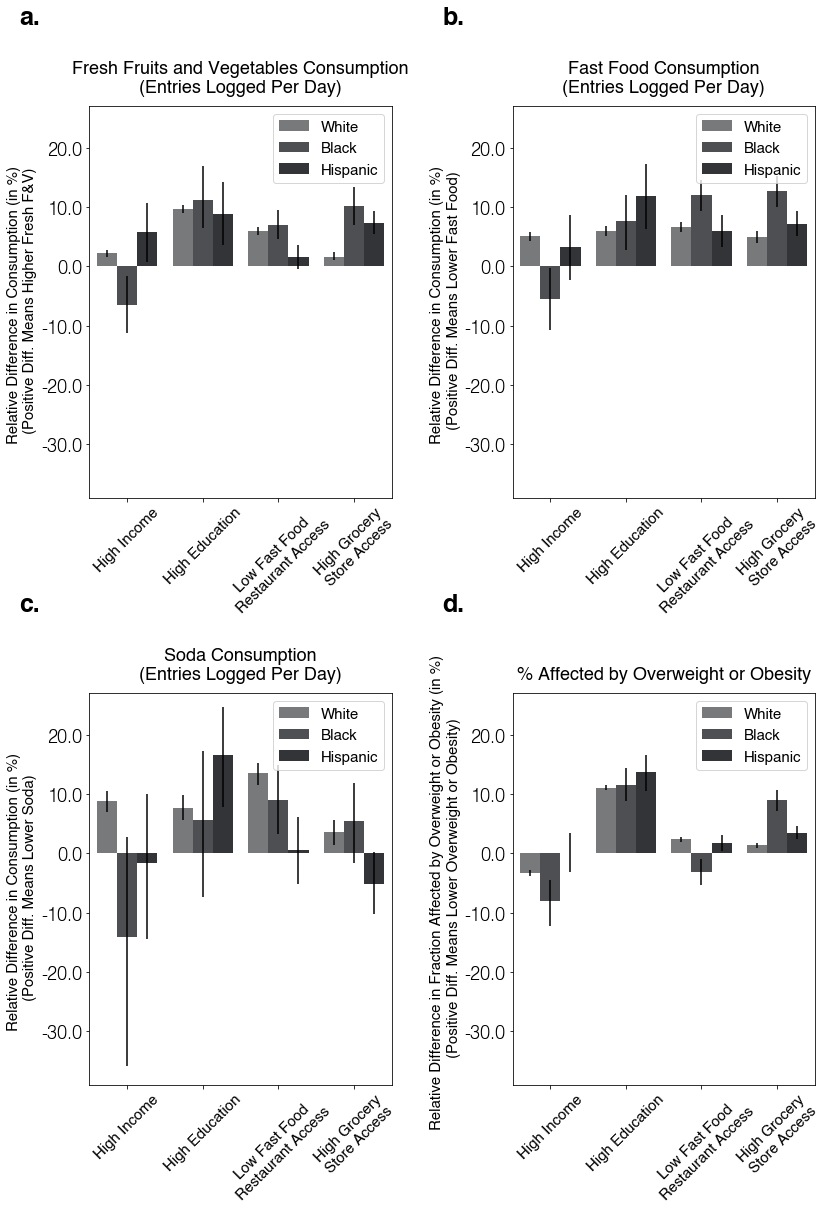

In [14]:
plt.rcParams['pdf.fonttype'] = 42

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.sans-serif':'Helvetica'})
matplotlib.rcParams.update({'font.size': 15})

ticks_font = {'family':'Helveticalight','weight' : 'normal', 'size' : 18}

fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(13, 18))

fresh_fv_label = 'Relative Difference in Consumption (in %) \n (Positive Diff. Means Higher Fresh F&V)'
ff_label = 'Relative Difference in Consumption (in %) \n (Positive Diff. Means Lower Fast Food)'
soda_label = 'Relative Difference in Consumption (in %) \n (Positive Diff. Means Lower Soda)'
obese_label = 'Relative Difference in Fraction Affected by Overweight or Obesity (in %) \n (Positive Diff. Means Lower Overweight or Obesity)'


for graphFull in [(FreshFV,0,0,"Fresh Fruits and Vegetables Consumption\n(Entries Logged Per Day)",fresh_fv_label),(FastFood,0,1,"Fast Food Consumption\n(Entries Logged Per Day)",ff_label),(Soda,1,0,"Soda Consumption\n(Entries Logged Per Day)",soda_label),(BMI,1,1,"% Affected by Overweight or Obesity",obese_label)]:
    graph=graphFull[0]

    x = [z[0] for z in graph]
    y = [z[1] for z in graph]
    
    lower = [z[3] for z in graph]
    upper = [z[2] for z in graph]
    axs[graphFull[1],graphFull[2]].set_ylim(-39,27)
    axs[graphFull[1],graphFull[2]].set_ylabel(graphFull[4])
    axs[graphFull[1],graphFull[2]].set_yticklabels(axs[graphFull[1],graphFull[2]].get_yticks(), ticks_font)

    g = sns.barplot(x=x, y=y, palette=['#77797c','#4c4f54','#313438'],hue=race,ax=axs[graphFull[1],graphFull[2]], data=None,**{'yerr_long':[lower,upper],"yerr_interval":4}).set_title(graphFull[3],y=1.02)

fig.subplots_adjust(hspace=.5)
fig.subplots_adjust(wspace=.4)
    
def get_axis_limits(ax, scale=.9):
    return ax.get_xlim()[1]*scale, ax.get_ylim()[1]*scale

letters=['a.','b.','c.','d.']
for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=45)
    ax.annotate(letters.pop(0),(0, 1),xytext=(-70,100),fontname="Helveticabold" ,fontsize=25,xycoords='axes fraction',textcoords='offset points', ha='left', va='top')
    ax.xaxis.labelpad = 20

plt.savefig('../FigureOutputs/Figure5.pdf',format='pdf')